# Statistical Experiments and Significance Testing

Design of experiments is a cornerstone of the practice of statistics, with
applications in virtually all areas of research. The goal is to design an experiment
in order to confirm or reject a hypothesis. Data scientists are faced with the need
to conduct continual experiments, particularly regarding user interface and product
marketing. This chapter reviews traditional experimental design and discusses
some common challenges in data science. It also covers some oft-cited concepts
in statistical inference and explains their meaning and relevance (or lack of
relevance) to data science.

Whenever you see references to statistical significance, t-tests, or p-values, it is
typically in the context of the classical statistical inference “pipeline” . 

Fig.3: Formulate hypothesis -> Design experiment -> Collect data -> Inference/conclusions

This process starts with a hypothesis (“drug A is better than the
existing standard drug,” “price A is more profitable than the existing price B”).
An experiment (it might be an A/B test) is designed to test the hypothesis —
designed in such a way that, hopefully, will deliver conclusive results. The data is
collected and analyzed, and then a conclusion is drawn. The term inference
reflects the intention to apply the experiment results, which involve a limited set
of data, to a larger process or population.

## 1. A/B Testing

An A/B test is an experiment with two groups to establish which of two
treatments, products, procedures, or the like is superior. Often one of the two
treatments is the standard existing treatment, or no treatment. If a standard (or no)
treatment is used, it is called the control. A typical hypothesis is that treatment is
better than control.

KEY TERMS FOR A/B TESTING

Treatment:
Something (drug, price, web headline) to which a subject is exposed.  
Treatment group:
A group of subjects exposed to a specific treatment.  
Control group:
A group of subjects exposed to no (or standard) treatment.  
Randomization:
The process of randomly assigning subjects to treatments.  
Subjects:
The items (web visitors, patients, etc.) that are exposed to treatments.  
Test statistic:
The metric used to measure the effect of the treatment.

A proper A/B test has subjects that can be assigned to one treatment or another.
The subject might be a person, a plant seed, a web visitor; the key is that the
subject is exposed to the treatment. Ideally, subjects are randomized (assigned
randomly) to treatments. In this way, you know that any difference between the
treatment groups is due to one of two things:

The effect of the different treatments  
Luck of the draw in which subjects are assigned to which treatments

You also need to pay attention to the test statistic or metric you use to compare
group A to group B. Perhaps the most common metric in data science is a binary
variable: click or no-click, buy or don’t buy, fraud or no fraud, and so on. Those
results would be summed up in a 2×2 table.

### Why have a control group?

Without a control group, there is no assurance that “other things are equal” and
that any difference is really due to the treatment (or to chance). When you have a
control group, it is subject to the same conditions (except for the treatment of
interest) as the treatment group. If you simply make a comparison to “baseline” or
prior experience, other factors, besides the treatment, might differ.

The use of A/B testing in data science is typically in a web context. Treatments
might be the design of a web page, the price of a product, the wording of a
headline, or some other item. Some thought is required to preserve the principles
of randomization. Typically the subject in the experiment is the web visitor, and
the outcomes we are interested in measuring are clicks, purchases, visit duration,
number of pages visited, whether a particular page is visited, and the like. In a
standard A/B experiment, you need to decide on one metric ahead of time.
Multiple behavior metrics might be collected and be of interest, but if the
experiment is expected to lead to a decision between treatment A and treatment B,
a single metric, or test statistic, needs to be established beforehand. Selecting a
test statistic after the experiment is conducted opens the door to researcher bias.

### Why just A/B? Why not C, D, ...?

Data scientists are less interested in the
question:
Is the difference between price A and price B statistically significant?
than in the question:
Which, out of multiple possible prices, is best?
For this, a relatively new type of experimental design is used: the multi-arm
bandit

KEY IDEAS

Subjects are assigned to two (or more) groups that are treated exactly alike, except that the
treatment under study differs from one to another.  
Ideally, subjects are assigned randomly to the groups.

## 2. Hypothesis Tests

Hypothesis tests, also called significance tests, are ubiquitous in the traditional
statistical analysis of published research. Their purpose is to help you learn
whether random chance might be responsible for an observed effect.

KEY TERMS

Null hypothesis:
The hypothesis that chance is to blame.  
Alternative hypothesis:
Counterpoint to the null (what you hope to prove).  
One-way test:
Hypothesis test that counts chance results only in one direction.  
Two-way test:
Hypothesis test that counts chance results in two directions.

An A/B test (see “A/B Testing”) is typically constructed with a hypothesis in
mind. For example, the hypothesis might be that price B produces higher profit.
Why do we need a hypothesis? Why not just look at the outcome of the experiment
and go with whichever treatment does better?

The answer lies in the tendency of the human mind to underestimate the scope of
natural random behavior. One manifestation of this is the failure to anticipate
extreme events, or so-called “black swans” (see “Long-Tailed Distributions”).
Another manifestation is the tendency to misinterpret random events as having
patterns of some significance. Statistical hypothesis testing was invented as a way
to protect researchers from being fooled by random chance.

In a properly designed A/B test, you collect data on treatments A and B in such a
way that any observed difference between A and B must be due to either:

Random chance in assignment of subjects  
A true difference between A and B  

A statistical hypothesis test is further analysis of an A/B test, or any randomized
experiment, to assess whether random chance is a reasonable explanation for the
observed difference between groups A and B.

### The Null hypothesis

Hypothesis tests use the following logic: “Given the human tendency to react to
unusual but random behavior and interpret it as something meaningful and real, in
our experiments we will require proof that the difference between groups is more
extreme than what chance might reasonably produce.” This involves a baseline
assumption that the treatments are equivalent, and any difference between the
groups is due to chance. This baseline assumption is termed the null hypothesis.
Our hope is then that we can, in fact, prove the null hypothesis wrong, and show
that the outcomes for groups A and B are more different than what chance might
produce.

One way to do this is via a resampling permutation procedure, in which we
shuffle together the results from groups A and B and then repeatedly deal out the
data in groups of similar sizes, then observe how often we get a difference as
extreme as the observed difference.



### Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis, but also an
offsetting alternative hypothesis. Here are some examples:

Null = “no difference between the means of group A and group B,”
alternative = “A is different from B” (could be bigger or smaller)  
Null = “A<=B,” alternative = “B > A”  
Null = “B is not X% greater than A,” alternative = “B is X% greater than A”  

Taken together, the null and alternative hypotheses must account for all
possibilities. The nature of the null hypothesis determines the structure of the
hypothesis test.

### One-Way, Two-Way Hypothesis Test

Often, in an A/B test, you are testing a new option (say B), against an established
default option (A) and the presumption is that you will stick with the default
option unless the new option proves itself definitively better. In such a case, you
want a hypothesis test to protect you from being fooled by chance in the direction
favoring B. You don’t care about being fooled by chance in the other direction,
because you would be sticking with A unless B proves definitively better. So you
want a directional alternative hypothesis (B is better than A). In such a case, you
use a one-way (or one-tail) hypothesis test. This means that extreme chance results
in only one direction direction count toward the p-value.

If you want a hypothesis test to protect you from being fooled by chance in either
direction, the alternative hypothesis is bidirectional (A is different from B; could
be bigger or smaller). In such a case, you use a two-way (or two-tail) hypothesis.
This means that extreme chance results in either direction count toward the pvalue.

KEY IDEAS

A null hypothesis is a logical construct embodying the notion that nothing special has happened,
and any effect you observe is due to random chance.  
The hypothesis test assumes that the null hypothesis is true, creates a “null model” (a probability
model), and tests whether the effect you observe is a reasonable outcome of that model.

## 3. Resampling
Resampling in statistics means to repeatedly sample values from observed data,
with a general goal of assessing random variability in a statistic. It can also be
used to assess and improve the accuracy of some machine-learning models (e.g.,
the predictions from decision tree models built on multiple bootstrapped data sets
can be averaged in a process known as bagging: see “Bagging and the Random
Forest”).

There are two main types of resampling procedures: the bootstrap and
permutation tests. The bootstrap is used to assess the reliability of an estimate; it
was discussed in the chapter 2. Permutation tests
are used to test hypotheses, typically involving two or more groups, and we
discuss those in this section.

KEY TERMS

Permutation test:
The procedure of combining two or more samples together, and randomly (or exhaustively)
reallocating the observations to resamples.
Synonyms:
Randomization test, random permutation test, exact test.  
With or without replacement:
In sampling, whether or not an item is returned to the sample before the next draw.

### Permutation Test

In a permutation procedure, two or more samples are involved, typically the
groups in an A/B or other hypothesis test. Permute means to change the order of a
set of values. The first step in a permutation test of a hypothesis is to combine the
results from groups A and B (and, if used, C, D, …) together. This is the logical
embodiment of the null hypothesis that the treatments to which the groups were
exposed do not differ. We then test that hypothesis by randomly drawing groups
from this combined set, and seeing how much they differ from one another. The
permutation procedure is as follows:

1. Combine the results from the different groups in a single data set.
2. Shuffle the combined data, then randomly draw (without replacing) a
resample of the same size as group A.
3. From the remaining data, randomly draw (without replacing) a resample
of the same size as group B.
4. Do the same for groups C, D, and so on.
5. Whatever statistic or estimate was calculated for the original samples
(e.g., difference in group proportions), calculate it now for the
resamples, and record; this constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of
the test statistic.

Now go back to the observed difference between groups and compare it to the set
of permuted differences. If the observed difference lies well within the set of
permuted differences, then we have not proven anything — the observed
difference is within the range of what chance might produce. However, if the
observed difference lies outside most of the permutation distribution, then we
conclude that chance is not responsible. In technical terms, the difference is
statistically significant.

### Example: Web Stickiness

A company selling a relatively high-value service wants to test which of two web
presentations does a better selling job. Due to the high value of the service being
sold, sales are infrequent and the sales cycle is lengthy; it would take too long to
accumulate enough sales to know which presentation is superior. So the company
decides to measure the results with a proxy variable, using the detailed interior
page that describes the service.

(A proxy variable is one that stands in for the true variable of interest, which may be unavailable,
too costly, or too time-consuming to measure. In climate research, for example, the oxygen
content of ancient ice cores is used as a proxy for temperature. It is useful to have at least some
data on the true variable of interest, so the strength of its association with the proxy can be
assessed.)

One potential proxy variable for our company is the number of clicks on the
detailed landing page. A better one is how long people spend on the page. It is
reasonable to think that a web presentation (page) that holds people’s attention
longer will lead to more sales. Hence, our metric is average session time,
comparing page A to page B.

Due to the fact that this is an interior, special-purpose page, it does not receive a
huge number of visitors. Also note that Google Analytics, which is how we
measure session time, cannot measure session time for the last session a person
visits. Instead of deleting that session from the data, though, GA records it as a
zero, so the data requires additional processing to remove those sessions. The
result is a total of 36 sessions for the two different presentations, 21 for page A
and 15 for page B.



In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [2]:
# define paths to the dataset

DATA = Path().resolve() / 'data'

WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
CLICK_RATE_CSV = DATA / 'click_rates.csv'
IMANISHI_CSV = DATA / 'imanishi_data.csv'

In [3]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

Text(0.5, 0.98, '')

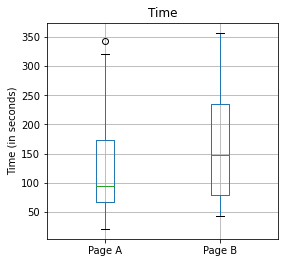

In [4]:
# The boxplot, shown in Figure 3-3, indicates that page B leads to longer sessions
# than page A.

ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [5]:
# Page B has session times greater, on average, by 36 seconds versus page A. The
# question is whether this difference is within the range of what random chance
# might produce, or, alternatively, is statistically significant.

mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [9]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

32.00952380952381


Text(0, 0.5, 'Frequency')

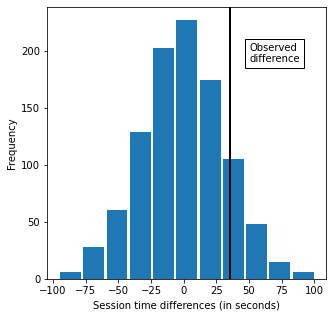

In [10]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

The histogram, shown in Figure 3-4 shows that mean difference of random
permutations often exceeds the observed difference in session times (the vertical
line). This suggests that the oberved difference in session time between page A
and page B is well within the range of chance variation, thus is not statistically
significant.

### Exhaustive and Bootstrap Permutation Test

In addition to the preceding random shuffling procedure, also called a random
permutation test or a randomization test, there are two variants of the
permutation test:  
An exhaustive permutation test  
A bootstrap permutation test  





In an exhaustive permutation test, instead of just randomly shuffling and dividing
the data, we actually figure out all the possible ways it could be divided. This is
practical only for relatively small sample sizes. With a large number of repeated
shufflings, the random permutation test results approximate those of the exhaustive
permutation test, and approach them in the limit. Exhaustive permutation tests are
also sometimes called exact tests, due to their statistical property of guaranteeing
that the null model will not test as “significant” more than the alpha level of the
test (see “Statistical Significance and P-Values”).

In a bootstrap permutation test, the draws outlined in steps 2 and 3 of the random
permutation test are made with replacement instead of without replacement. In
this way the resampling procedure models not just the random element in the
assignment of treatment to subject, but also the random element in the selection of
subjects from a population. Both procedures are encountered in statistics, and the
distinction between them is somewhat convoluted and not of consequence in the
practice of data science.

### Permutation Tests: The Bottom Line for Data Science

Permutation tests are useful heuristic procedures for exploring the role of random
variation. They are relatively easy to code, interpret and explain, and they offer a
useful detour around the formalism and “false determinism” of formula-based
statistics.

One virtue of resampling, in contrast to formula approaches, is that it comes much
closer to a “one size fits all” approach to inference. Data can be numeric or
binary. Sample sizes can be the same or different. Assumptions about normally distributed
data are not needed.

KEY IDEAS

In a permutation test, multiple samples are combined, then shuffled.  
The shuffled values are then divided into resamples, and the statistic of interest is calculated.  
This process is then repeated, and the resampled statistic is tabulated.  
Comparing the observed value of the statistic to the resampled distribution allows you to judge
whether an observed difference between samples might occur by chance.

## 4. Statistical Significance and P-Values

Statistical significance is how statisticians measure whether an experiment (or
even a study of existing data) yields a result more extreme than what chance might
produce. If the result is beyond the realm of chance variation, it is said to be
statistically significant.

KEY TERMS

P-value:
Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining
results as unusual or extreme as the observed results.  
Alpha:
The probability threshold of “unusualness” that chance results must surpass, for actual outcomes
to be deemed statistically significant.  
Type 1 error:
Mistakenly concluding an effect is real (when it is due to chance).  
Type 2 error:
Mistakenly concluding an effect is due to chance (when it is real).

The following
permutation procedure asks “if the two prices share the same conversion rate,
could chance variation produce a difference as big as 5%?”

1. Create an urn with all sample results: this represents the supposed shared
conversion rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%.
2. Shuffle and draw out a resample of size 23,739 (same n as price A), and
record how many 1s.
3. Record the number of 1s in the remaining 22,588 (same n as price B).
4. Record the difference in proportion 1s.
5. Repeat steps 2–4.
6. How often was the difference >= 0.0368?

Observed difference: 0.0368%


Text(0, 0.5, 'Frequency')

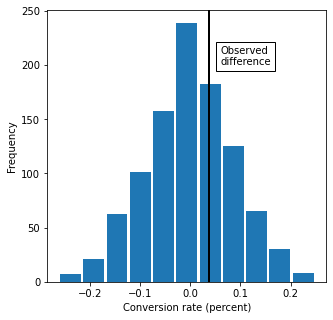

In [11]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

See the histogram of 1,000 resampled results in Figure 3-5: as it happens, in this
case the observed difference of 0.0368% is well within the range of chance
variation.

### P-value

Simply looking at the graph is not a very precise way to measure statistical
significance, so of more interest is the p-value. This is the frequency with which
the chance model produces a result more extreme than the observed result. We can
estimate a p-value from our permutation test by taking the proportion of times that
the permutation test produces a difference equal to or greater than the observed
difference:

In [14]:
# The p-value is 0.332, which means that we would expect to achieve the same
# result by random chance over 33% of the time.

# If `np.mean` is applied to a list of booleans, it gives the percentage of how often True was found in the list (#True / #Total).
print(np.mean([diff > obs_pct_diff for diff in perm_diffs])) 

0.332


The p-value is 0.332, which means that we would expect to achieve the same
result by random chance over 33% of the time. In this case, we didn’t need to use a permutation test to get a p-value. Since we
have a binomial distribution, we can approximate the p-value using the normal
distribution

In [15]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


The normal approximation yields a p-value of 0.3498, which
is close to the p-value obtained from the permutation test.

### Alpha

Statisticians frown on the practice of leaving it to the researcher’s discretion to
determine whether a result is “too unusual” to happen by chance. Rather, a threshold is specified in advance, as in “more extreme than 5% of the chance (null
hypothesis) results”; this threshold is known as alpha. Typical alpha levels are
5% and 1%.

the probability question being answered is not “what is the probability that this
happened by chance?” but rather “given a chance model, what is the probability of
a result this extreme?”

### Value of P-value

Here’s what we would like the p-value to convey:
The probability that the result is due to chance.
We hope for a low value, so we can conclude that we’ve proved something.

But here’s what the pvalue
actually represents:
The probability that, given a chance model, results as extreme as the observed
results could occur.

1. P-values can indicate how incompatible the data are with a specified
statistical model.
2. P-values do not measure the probability that the studied hypothesis is
true, or the probability that the data were produced by random chance
alone.
3. Scientific conclusions and business or policy decisions should not be
based only on whether a p-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A p-value, or statistical significance, does not measure the size of an
effect or the importance of a result.
6. By itself, a p-value does not provide a good measure of evidence
regarding a model or hypothesis.

### Type 1 and 2 errors

Type 2 error is not so much an error as a judgment that the sample size
is too small to detect the effect. When a p-value falls short of statistical
significance (e.g., it exceeds 5%), what we are really saying is “effect not
proven.” It could be that a larger sample would yield a smaller p-value.

The basic function of significance tests (also called hypothesis tests) is to protect
against being fooled by random chance; thus they are typically structured to
minimize Type 1 errors.

### Data science and P-value

For a data scientist, a p-value is a useful metric in situations where you
want to know whether a model result that appears interesting and useful is within
the range of normal chance variability. As a decision tool in an experiment, a p-value
should not be considered controlling, but merely another point of
information bearing on a decision. For example, p-values are sometimes used as
intermediate inputs in some statistical or machine learning models — a feature
might be included in or excluded from a model depending on its p-value.

## 5. t-Tests

There are numerous types of significance tests, depending on whether the data
comprises count data or measured data, how many samples there are, and what’s
being measured. A very common one is the t-test, named after Student’s t-distribution

KEY TERMS

Test statistic:
A metric for the difference or effect of interest.  
t-statistic:
A standardized version of the test statistic.  
t-distribution:
A reference distribution (in this case derived from the null hypothesis), to which the observed tstatistic
can be compared.

All significance tests require that you specify a test statistic to measure the effect
you are interested in, and help you determine whether that observed effect lies
within the range of normal chance variation. In a resampling test (see the
discussion of permutation in “Permutation Test”), the scale of the data does not
matter. You create the reference (null hypothesis) distribution from the data itself,
and use the test statistic as is.

Statisticians found that a good approximation to the permutation (shuffled)
distribution was the t-test, based on Gossett’s t-distribution. It is used for the very
common two-sample comparison — A/B test — in which the data is numeric. But
in order for the t-distribution to be used without regard to scale, a standardized
form of the test statistic must be used.

KEY IDEAS

Before the advent of computers, resampling tests were not practical and statisticians used standard
reference distributions.  
A test statistic could then be standardized and compared to the reference distribution.  
One such widely used standardized statistic is the t-statistic.

In [16]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [17]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


## 6. ANOVA

Suppose that, instead of an A/B test, we had a comparison of multiple groups, say
A-B-C-D, each with numeric data. The statistical procedure that tests for a
statistically significant difference among the groups is called analysis of
variance, or ANOVA.

KEY TERMS FOR ANOVA

Pairwise comparison: 
A hypothesis test (e.g., of means) between two groups among multiple groups.  
Omnibus test:
A single hypothesis test of the overall variance among multiple group means.  
Decomposition of variance:
Separation of components. contributing to an individual value (e.g., from the overall average, from
a treatment mean, and from a residual error).  
F-statistic:
A standardized statistic that measures the extent to which differences among group means
exceeds what might be expected in a chance model.  
SS:
“Sum of squares,” referring to deviations from some average value.

Table 3-3 shows the stickiness of four web pages, in numbers of seconds spent on
the page. The four pages are randomly switched out so that each web visitor
receives one at random. There are a total of five visitors for each page, and, in
Table 3-3, each column is an independent set of data. The first viewer for page 1
has no connection to the first viewer for page 2. Note that in a web test like this,
we cannot fully implement the classic randomized sampling design in which each
visitor is selected at random from some huge population. We must take the visitors
as they come. Visitors may systematically differ depending on time of day, time of
week, season of the year, conditions of their internet, what device they are using,
and so on. These factors should be considered as potential bias when the
experiment results are reviewed.

In [56]:
# Table 3-3

four_sessions = pd.read_csv(FOUR_SESSIONS_CSV)

pd.DataFrame({"Page 1": four_sessions.loc[four_sessions.Page == 'Page 1', 'Time'].reset_index(drop=True),
"Page 2": four_sessions.loc[four_sessions.Page == 'Page 2', 'Time'].reset_index(drop=True),
"Page 3": four_sessions.loc[four_sessions.Page == 'Page 3', 'Time'].reset_index(drop=True),
"Page 4": four_sessions.loc[four_sessions.Page == 'Page 4', 'Time'].reset_index(drop=True),
})

,Page 1,Page 2,Page 3,Page 4
0,164,178,175,155
1,172,191,193,166
2,177,182,171,164
3,156,185,163,170
4,195,177,176,168


Text(0.5, 1.0, '')

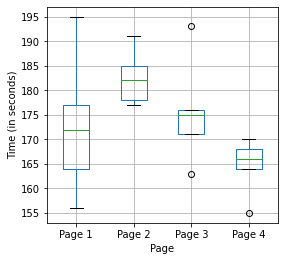

In [53]:
# Boxplots of the four groups show considerable differences among them

ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

In [41]:
# pd.pivot_table(four_sessions, values='Time', index=['Page'],
#                     columns=['Page'])



The more such pairwise comparisons we make, the greater the potential for being
fooled by random chance (see “Multiple Testing”). Instead of worrying about all
the different comparisons between individual pages we could possibly make, we
can do a single overall omnibus test that addresses the question, “Could all the
pages have the same underlying stickiness, and the differences among them be due
to the random way in which a common set of session times got allocated among
the four pages?”

The procedure used to test this is ANOVA. The basis for it can be seen in the
following resampling procedure (specified here for the A-B-C-D test of web page
stickiness):
1. Combine all the data together in a single box
2. Shuffle and draw out four resamples of five values each
3. Record the mean of each of the four groups
4. Record the variance among the four group means
5. Repeat steps 2–4 many times (say 1,000)

In [57]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
25.400000000000034


Pr(Prob) 0.07533333333333334


Text(0, 0.5, 'Frequency')

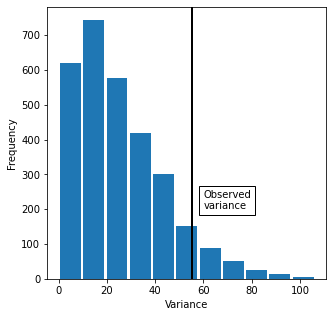

In [65]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

### F-statistic

Just like the t-test can be used instead of a permutation test for comparing the mean
of two groups, there is a statistical test for ANOVA based on the F-statistic. F-statistic is based on the ratio of the variance across group means (i.e., the
treatment effect) to the variance due to residual error. The higher this ratio, the
more statistically significant the result. If the data follows a normal distribution,
then statistical theory dictates that the statistic should have a certain distribution.
Based on this, it is possible to compute a p-value.

In [66]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


In [67]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time, 
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

F-Statistic: 1.3699
p-value: 0.0388


### Two-Way ANOVA

The A-B-C-D test just described is a “one-way” ANOVA, in which we have one
factor (group) that is varying. We could have a second factor involved — say,
“weekend versus weekday” — with data collected on each combination (group A
weekend, group A weekday, group B weekend, etc.). This would be a “two-way
ANOVA,” and we would handle it in similar fashion to the one-way ANOVA by
identifying the “interaction effect.” After identifying the grand average effect, and
the treatment effect, we then separate the weekend and the weekday observations
for each group, and find the difference between the averages for those subsets and
the treatment average.

Two-way anova only available with statsmodels
```
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
```

KEY IDEAS

ANOVA is a statistical proecdure for analyzing the results of an experiment with multiple groups.  
It is the extension of similar procedures for the A/B test, used to assess whether the overall
variation among groups is within the range of chance variation.  
A useful outcome of an ANOVA is the identification of variance components associated with group
treatments, interaction effects, and errors.

## 7. Power and sample size

If you run a web test, how do you decide how long it should run (i.e., how many
impressions per treatment are needed)? Despite what you may read in many
guides to web testing on the web, there is no good general guidance — it depends,
mainly, on the frequency with which the desired goal is attained.

KEY TERMS

Effect size:
The minimum size of the effect that you hope to be able to detect in a statistical test, such as “a
20% improvement in click rates”.  
Power:
The probability of detecting a given effect size with a given sample size.  
Significance level:
The statistical significance level at which the test will be conducted.

One step in statistical calculations for sample size is to ask “Will a hypothesis test
actually reveal a difference between treatments A and B?” The outcome of a
hypothesis test — the p-value — depends on what the real difference is between
treatment A and treatment B. It also depends on the luck of the draw — who gets
selected for the groups in the experiment. But it makes sense that the bigger the
actual difference between treatments A and B, the greater the probability that our
experiment will reveal it; and the smaller the difference, the more data will be
needed to detect it. To distinguish between a .350 hitter in baseball, and a .200
hitter, not that many at-bats are needed. To distinguish between a .300 hitter and a
.280 hitter, a good many more at-bats will be needed.

Power is the probability of detecting a specified effect size with specified sample
characteristics (size and variability). For example, we might say (hypothetically)
that the probability of distinguishing between a .330 hitter and a .200 hitter in 25
at-bats is 0.75. The effect size here is a difference of .130. And “detecting” means
that a hypothesis test will reject the null hypothesis of “no difference” and
conclude there is a real effect. So the experiment of 25 at-bats (n = 25) for two
hitters, with an effect size of 0.130, has (hypothetical) power of 0.75 or 75%.

Here’s a fairly intuitive alternative approach:
1. Start with some hypothetical data that represents your best guess about
the data that will result (perhaps based on prior data) — for example, a
box with 20 ones and 80 zeros to represent a .200 hitter, or a box with
some observations of “time spent on website.”
2. Create a second sample simply by adding the desired effect size to the
first sample — for example, a second box with 33 ones and 67 zeros, or
a second box with 25 seconds added to each initial “time spent on
website.”
3. Draw a bootstrap sample of size n from each box.
4. Conduct a permutation (or formula-based) hypothesis test on the two
bootstrap samples and record whether the difference between them is
statistically significant.
5. Repeat the preceding two steps many times and determine how often the
difference was significant — that’s the estimated power.

### Sample size

The most common use of power calculations is to estimate how big a sample you
will need.

For example, suppose you are looking at click-through rates (clicks as a
percentage of exposures), and testing a new ad against an existing ad. How many
clicks do you need to accumulate in the study? If you are only interested in results
that show a huge difference (say a 50% difference), a relatively small sample
might do the trick. If, on the other hand, even a minor difference would be of
interest, then a much larger sample is needed. A standard approach is to establish
a policy that a new ad must do better than an existing ad by some percentage, say
10%; otherwise, the existing ad will remain in place. This goal, the “effect size,”
then drives the sample size.

for calculating power or required sample size, there are four moving
parts:  
Sample size  
Effect size you want to detect  
Significance level (alpha) at which the test will be conducted  
Power

Specify any three of them, and the fourth can be calculated. Most commonly, you
would want to calculate sample size, so you must specify the other three.

In [70]:
# statsmodels has a number of methods for power calculation

# see e.g.: https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [69]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


KEY IDEAS

Finding out how big a sample size you need requires thinking ahead to the statistical test you plan to
conduct.  
You must specify the minimum size of the effect that you want to detect.  
You must also specify the required probability of detecting that effect size (power).  
Finally, you must specify the significance level (alpha) at which the test will be conducted.

## Summary

The principles of experimental design — randomization of subjects into two or
more groups receiving different treatments — allow us to draw valid conclusions
about how well the treatments work. It is best to include a control treatment of
“making no change.” The subject of formal statistical inference — hypothesis
testing, p-values, t-tests, and much more along these lines — occupies much time
and space in a traditional statistics course or text, and the formality is mostly
unneeded from a data science perspective. However, it remains important to
recognize the role that random variation can play in fooling the human brain.
Intuitive resampling procedures (permutation and bootstrap) allow data scientists
to gauge the extent to which chance variation can play a role in their data analysis.